In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
from datetime import datetime

In [2]:
df_QQQ_pnl = pd.read_csv('QQQ_run/BACK_TestQQQLong_2022-12-15_064748_start_01-04-2021_end_07-01-2022_pnl.csv')
df_QQQ_pnl.head()

Name                         Time  Cumulative PnL
0  TestQQQLong  2021-Jan-04 14:30:12.620528             0.0
1  TestQQQLong  2021-Jan-04 14:31:12.838126             0.0
2  TestQQQLong  2021-Jan-04 14:32:12.934567             0.0
3  TestQQQLong  2021-Jan-04 14:33:13.191112             0.0
4  TestQQQLong  2021-Jan-04 14:34:13.378533             0.0

In [3]:
#test
a = datetime.strptime('2021-Jan-04 14:30:12.620528', '%Y-%b-%d %H:%M:%S.%f')

In [4]:
#eg. '2021-Jan-04 14:30:12.620528', '%Y-%b-%d %H:%M:%S.%f'
#eg. '2021-Jan-05 05:00:00', '%Y-%b-%d %H:%M:%S'
def try_parsing_date(text):
    for fmt in ('%Y-%b-%d %H:%M:%S.%f', '%Y-%b-%d %H:%M:%S'):
        try:
            return datetime.strptime(str(text), fmt)
        except ValueError:
            pass

In [5]:
df_QQQ_pnl['Time'] = df_QQQ_pnl['Time'].apply(lambda x: try_parsing_date(x))

In [6]:
df_QQQ_pnl.head()

Name                       Time  Cumulative PnL
0  TestQQQLong 2021-01-04 14:30:12.620528             0.0
1  TestQQQLong 2021-01-04 14:31:12.838126             0.0
2  TestQQQLong 2021-01-04 14:32:12.934567             0.0
3  TestQQQLong 2021-01-04 14:33:13.191112             0.0
4  TestQQQLong 2021-01-04 14:34:13.378533             0.0

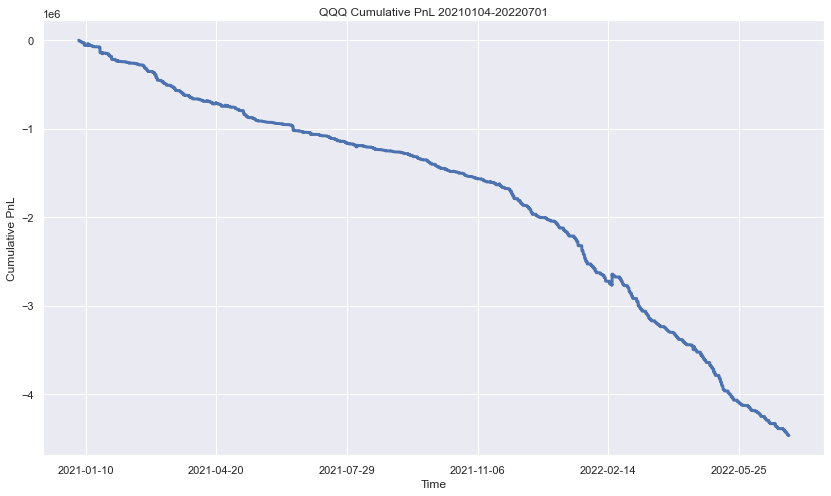

In [7]:
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(14,8)})

ax = sns.lineplot(data=df_QQQ_pnl, x ='Time', y = 'Cumulative PnL',
                  palette='viridis',
                  legend='full', lw=3)

ax.xaxis.set_major_locator(ticker.AutoLocator())
plt.ylabel('Cumulative PnL')
plt.xlabel('Time')
plt.title('QQQ Cumulative PnL 20210104-20220701')
plt.show()

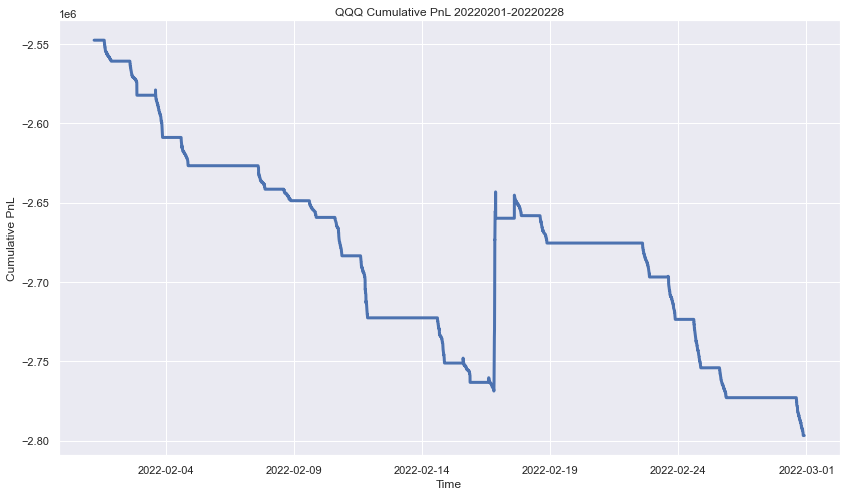

In [8]:
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(14,8)})

ax = sns.lineplot(data=df_QQQ_pnl.iloc[107893:115680], x ='Time', y = 'Cumulative PnL',
                  palette='viridis',
                  legend='full', lw=3)

ax.xaxis.set_major_locator(ticker.AutoLocator())
plt.ylabel('Cumulative PnL')
plt.xlabel('Time')
plt.title('QQQ Cumulative PnL 20220201-20220228')
plt.show()

In [9]:
#Position over time
df_QQQ_fill = pd.read_csv('QQQ_run/BACK_TestQQQLong_2022-12-15_064748_start_01-04-2021_end_07-01-2022_fill.csv')
df_QQQ_fill.head()

StrategyName                    TradeTime Symbol  Quantity   Price  \
0  TestQQQLong  2021-Jan-04 14:35:53.058628    QQQ       100  314.24   
1  TestQQQLong  2021-Jan-04 14:35:57.215529    QQQ       100  314.27   
2  TestQQQLong  2021-Jan-04 14:36:07.090895    QQQ       100  314.24   
3  TestQQQLong  2021-Jan-04 14:36:27.748080    QQQ       100  314.04   
4  TestQQQLong  2021-Jan-04 14:36:38.718768    QQQ       100  313.90   

   ExecutionCost LiquidityAction  LiquidityCode  RawLiquidity       Account  \
0           0.12         REMOVED              0           NaN  SIM-1001-101   
1           0.12         REMOVED              0           NaN  SIM-1001-101   
2           0.12         REMOVED              0           NaN  SIM-1001-101   
3           0.12         REMOVED              0           NaN  SIM-1001-101   
4           0.12         REMOVED              0           NaN  SIM-1001-101   

       Trader MarketCenter          OrderID  ExecID TransactionType  
0  dlariviere          IEX  364543941096506     NaN            FILL  
1  dlariviere          IEX  364543941096507     NaN            FILL  
2  dlariviere          IEX  364543941096508     NaN            FILL  
3  dlariviere          IEX  364543941096509     NaN            FILL  
4  dlariviere          IEX  364543941096510     NaN            FILL

In [10]:
df_QQQ_fill['TradeTime'] = df_QQQ_fill['TradeTime'].apply(lambda x: try_parsing_date(x))

In [11]:
df_QQQ_fill['Cur Position'] = df_QQQ_fill['Quantity'].cumsum()
df_QQQ_fill['Cur Position'].head()

0    100
1    200
2    300
3    400
4    500
Name: Cur Position, dtype: int64

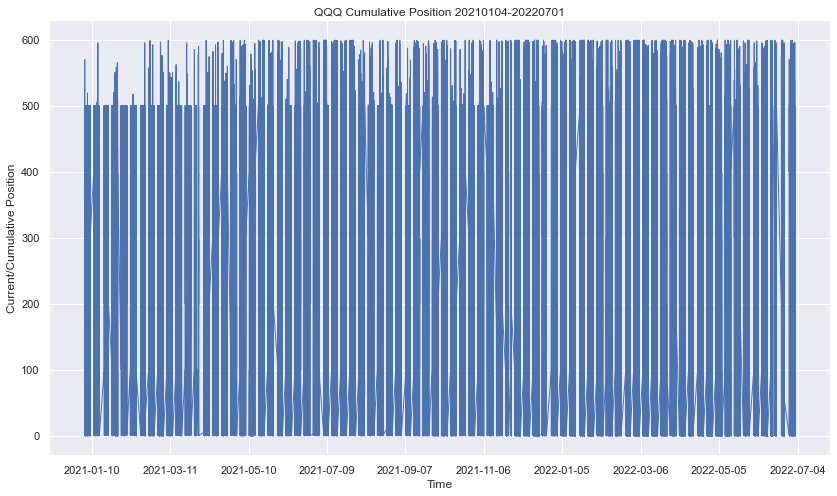

In [12]:
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(14,8)})

ax = sns.lineplot(data=df_QQQ_fill, x ='TradeTime', y = 'Cur Position',
                  palette='viridis',
                  legend='full', lw=1)

ax.xaxis.set_major_locator(ticker.MaxNLocator())
plt.ylabel('Current/Cumulative Position')
plt.xlabel('Time')
plt.title('QQQ Cumulative Position 20210104-20220701')
plt.show()

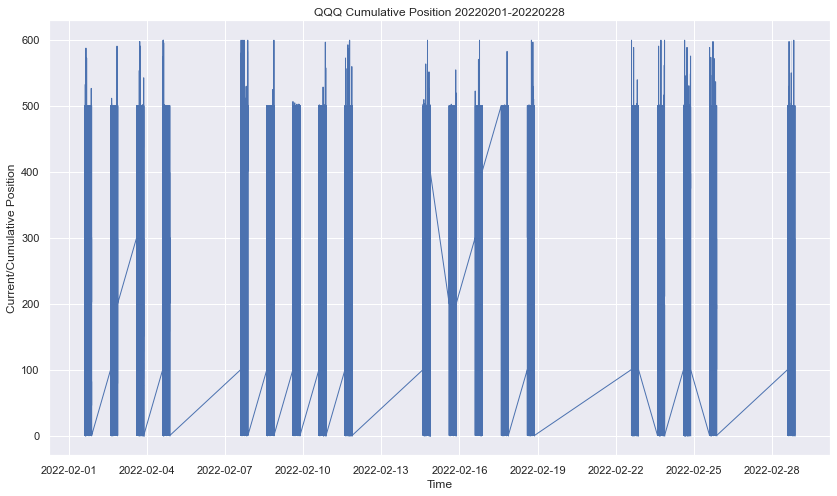

In [13]:
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(14,8)})

ax = sns.lineplot(data=df_QQQ_fill.iloc[469940:526774], x ='TradeTime', y = 'Cur Position',
                  palette='viridis',
                  legend='full', lw=1)

ax.xaxis.set_major_locator(ticker.MaxNLocator())
plt.ylabel('Current/Cumulative Position')
plt.xlabel('Time')
plt.title('QQQ Cumulative Position 20220201-20220228')
plt.show()

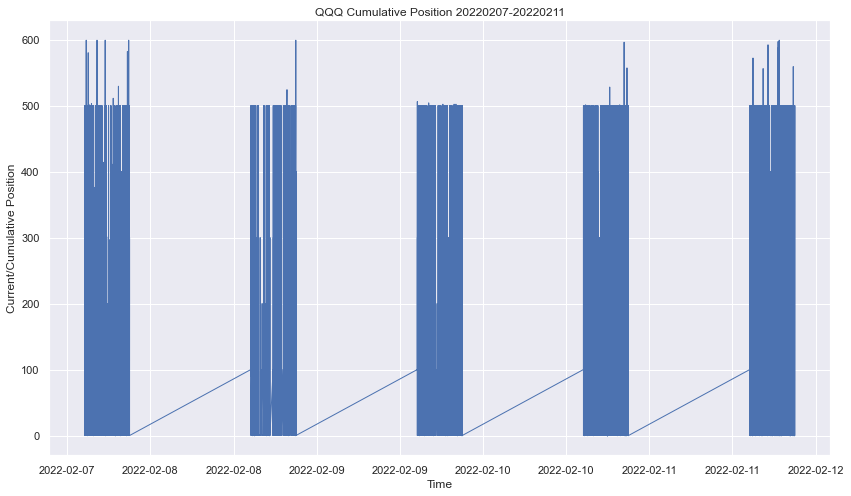

In [14]:
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(14,8)})

ax = sns.lineplot(data=df_QQQ_fill.iloc[481062:494018], x ='TradeTime', y = 'Cur Position',
                  palette='viridis',
                  legend='full', lw=1)

ax.xaxis.set_major_locator(ticker.MaxNLocator())
plt.ylabel('Current/Cumulative Position')
plt.xlabel('Time')
plt.title('QQQ Cumulative Position 20220207-20220211')
plt.show()

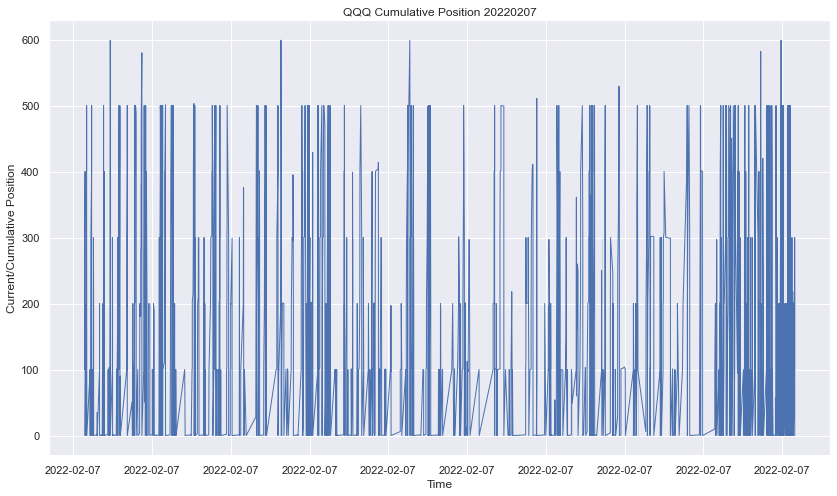

In [15]:
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(14,8)})

ax = sns.lineplot(data=df_QQQ_fill.iloc[481062:482986], x ='TradeTime', y = 'Cur Position',
                  palette='viridis',
                  legend='full', lw=1)

ax.xaxis.set_major_locator(ticker.MaxNLocator())
plt.ylabel('Current/Cumulative Position')
plt.xlabel('Time')
plt.title('QQQ Cumulative Position 20220207')
plt.show()

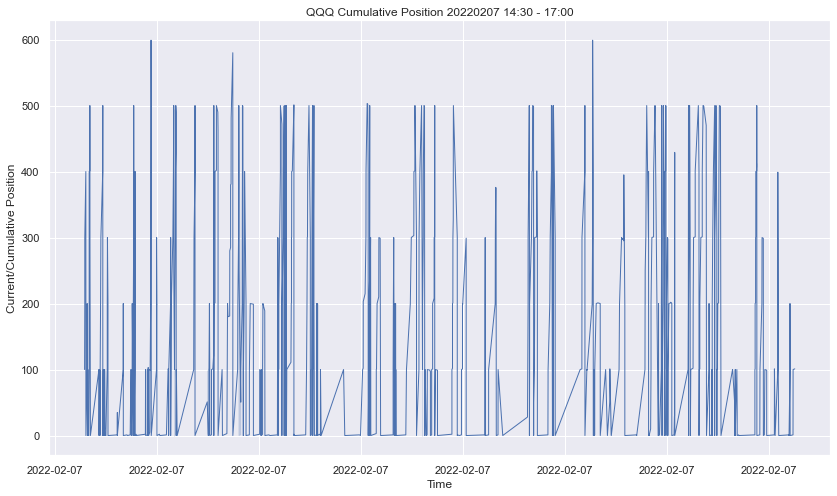

In [16]:
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(14,8)})

ax = sns.lineplot(data=df_QQQ_fill.iloc[481062:481877], x ='TradeTime', y = 'Cur Position',
                  palette='viridis',
                  legend='full', lw=1)

ax.xaxis.set_major_locator(ticker.MaxNLocator())
plt.ylabel('Current/Cumulative Position')
plt.xlabel('Time')
plt.title('QQQ Cumulative Position 20220207 14:30 - 17:00')
plt.show()

In [17]:
df_QQQ_fill.iloc[481062:482986]

StrategyName                  TradeTime Symbol  Quantity   Price  \
481062  TestQQQLong 2022-02-07 14:30:11.818195    QQQ       100  358.38   
481063  TestQQQLong 2022-02-07 14:30:14.340224    QQQ       100  358.43   
481064  TestQQQLong 2022-02-07 14:30:14.416568    QQQ         2  358.46   
481065  TestQQQLong 2022-02-07 14:30:14.534873    QQQ        98  358.46   
481066  TestQQQLong 2022-02-07 14:30:27.667953    QQQ       100  358.28   
...             ...                        ...    ...       ...     ...   
482981  TestQQQLong 2022-02-07 20:59:34.735514    QQQ       100  354.85   
482982  TestQQQLong 2022-02-07 20:59:36.172209    QQQ       100  354.83   
482983  TestQQQLong 2022-02-07 20:59:36.386679    QQQ       100  354.83   
482984  TestQQQLong 2022-02-07 20:59:38.092722    QQQ      -100  354.85   
482985  TestQQQLong 2022-02-07 20:59:40.000209    QQQ      -200  354.71   

        ExecutionCost LiquidityAction  LiquidityCode  RawLiquidity  \
481062       0.120000         REMOVED              0           NaN   
481063       0.120000         REMOVED              0           NaN   
481064       0.002400         REMOVED              0           NaN   
481065       0.117600           ADDED              0           NaN   
481066       0.120000         REMOVED              0           NaN   
...               ...             ...            ...           ...   
482981       0.120000         REMOVED              0           NaN   
482982       0.120000         REMOVED              0           NaN   
482983       0.120000         REMOVED              0           NaN   
482984       0.914864         REMOVED              0           NaN   
482985       1.829101         REMOVED              0           NaN   

             Account      Trader MarketCenter          OrderID  ExecID  \
481062  SIM-1001-101  dlariviere          IEX  364543941482579     NaN   
481063  SIM-1001-101  dlariviere          IEX  364543941482580     NaN   
481064  SIM-1001-101  dlariviere          IEX  364543941482581     NaN   
481065  SIM-1001-101  dlariviere          IEX  364543941482581     NaN   
481066  SIM-1001-101  dlariviere          IEX  364543941482582     NaN   
...              ...         ...          ...              ...     ...   
482981  SIM-1001-101  dlariviere          IEX  364543941483901     NaN   
482982  SIM-1001-101  dlariviere          IEX  364543941483902     NaN   
482983  SIM-1001-101  dlariviere          IEX  364543941483903     NaN   
482984  SIM-1001-101  dlariviere          IEX  364543941483904     NaN   
482985  SIM-1001-101  dlariviere          IEX  364543941483905     NaN   

       TransactionType  Cur Position  
481062            FILL           100  
481063            FILL           200  
481064            FILL           202  
481065            FILL           300  
481066            FILL           400  
...                ...           ...  
482981            FILL           100  
482982            FILL           200  
482983            FILL           300  
482984            FILL           200  
482985            FILL             0  

[1924 rows x 16 columns]

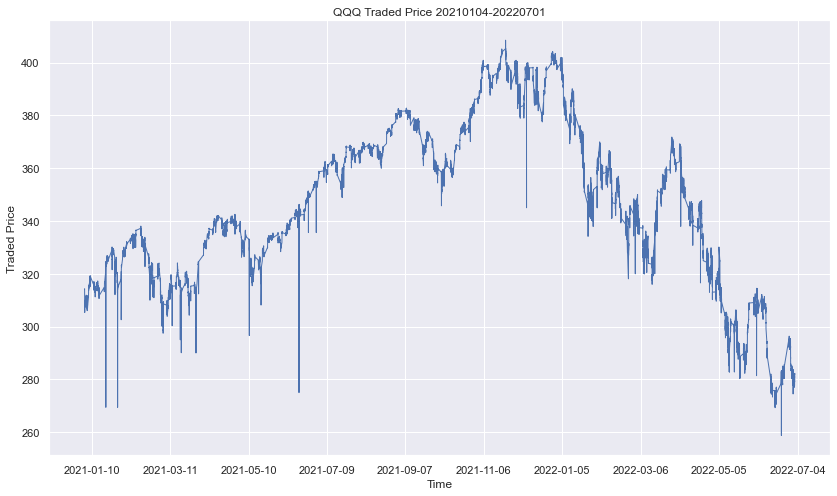

In [18]:
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(14,8)})

ax = sns.lineplot(data=df_QQQ_fill, x ='TradeTime', y = 'Price',
                  palette='viridis',
                  legend='full', lw=1)

ax.xaxis.set_major_locator(ticker.MaxNLocator())
plt.ylabel('Traded Price')
plt.xlabel('Time')
plt.title('QQQ Traded Price 20210104-20220701')
plt.show()

In [19]:
s = pd.to_datetime(df_QQQ_fill['TradeTime'])
df_QQQ_15D_trades_ct = s.groupby(s.dt.floor('15D')).size().reset_index(name='count')

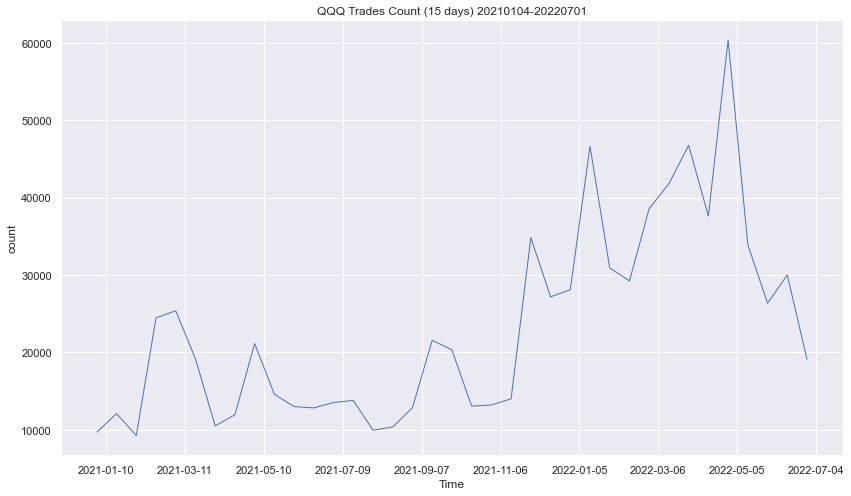

In [20]:
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(14,8)})

ax = sns.lineplot(data=df_QQQ_15D_trades_ct, x ='TradeTime', y = 'count',
                  palette='viridis',
                  legend='full', lw=1)

ax.xaxis.set_major_locator(ticker.MaxNLocator())
plt.ylabel('count')
plt.xlabel('Time')
plt.title('QQQ Trades Count (15 days) 20210104-20220701')
plt.show()